# Data Preparation - 1

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import notebook_utilitis as nu
import matplotlib.pyplot as plt
import seaborn as sns
import get_data as gd

In [2]:
train_data = gd.load_intermidiate_training_data()
test_data = gd.load_intermidiate_test_data()

# Droping insignificant Feature

In [3]:
columns_to_drop = ['PassengerId','Name','Cabin','Ticket'] # based on my analysis in EDA

In [4]:
train_data.drop(columns_to_drop,axis=1,inplace= True) # Data is loading from intermidate file hance is it safe to do inplace drop

In [5]:
test_data.drop(columns_to_drop,axis=1,inplace= True) # Data is loading from intermidate file hance is it safe to do inplace drop

In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,4,1,39.6875,S
1,0,3,male,11.0,0,0,18.7875,C
2,1,2,male,2.0,1,1,26.0000,S
3,0,2,male,27.0,0,0,26.0000,S
4,1,1,male,45.0,0,0,26.5500,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         571 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    710 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 44.6+ KB


----

# Filling Embarked Values

In [8]:
train_data['Embarked'].fillna(method='ffill', inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         571 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 44.6+ KB


# Imputing Missing Age Values

1. Split data in 2 sets: Missing ages and Filled ages

#### Data with missing age (That we would like to predict)

In [10]:
data_age_missing = train_data[train_data['Age'].isnull()]
data_age_missing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,1,male,NaN,0,0,0.0000,S
12,0,3,male,NaN,0,0,7.5500,S
17,1,3,female,NaN,2,0,23.2500,Q
21,0,1,male,NaN,0,0,42.4000,S
23,0,3,male,NaN,0,0,56.4958,S


#### Data with age value ( To Model)

In [11]:
data_with_age = train_data[train_data['Age'].notnull()]
data_with_age.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,4,1,39.6875,S
1,0,3,male,11.0,0,0,18.7875,C
2,1,2,male,2.0,1,1,26.0000,S
3,0,2,male,27.0,0,0,26.0000,S
4,1,1,male,45.0,0,0,26.5500,S


-----

### Model for predicting Ages

- Multi-colinearty Check

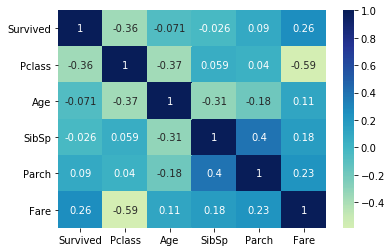

In [12]:
sns.heatmap(data_with_age.corr(), center=0,annot=True,cmap="YlGnBu")

In [13]:
data_with_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 711
Data columns (total 8 columns):
Survived    571 non-null int64
Pclass      571 non-null int64
Sex         571 non-null object
Age         571 non-null float64
SibSp       571 non-null int64
Parch       571 non-null int64
Fare        571 non-null float64
Embarked    571 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 40.1+ KB


In [14]:
data_with_age['Sex'].value_counts()

male      361
female    210
Name: Sex, dtype: int64

In [15]:
data_with_age['Survived'].value_counts()

0    340
1    231
Name: Survived, dtype: int64

### Train Test Split

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_split_data(raw_data, category): 
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)
    for train_index,test_index in split.split(raw_data, raw_data[category]):
        strat_train_set = raw_data.iloc[train_index]
        strat_test_set  = raw_data.iloc[test_index]
    return strat_train_set,strat_test_set

In [17]:
age_train, age_test = stratified_split_data(data_with_age,'Survived')

In [18]:
age_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 695 to 551
Data columns (total 8 columns):
Survived    456 non-null int64
Pclass      456 non-null int64
Sex         456 non-null object
Age         456 non-null float64
SibSp       456 non-null int64
Parch       456 non-null int64
Fare        456 non-null float64
Embarked    456 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 32.1+ KB


### Split Response and Features

In [19]:
age_train_y = age_train['Age']
age_test_y = age_test['Age'] 

In [20]:
age_train_x =  age_train.drop('Age',axis=1)
age_test_x =  age_test.drop('Age',axis=1)

### Scaling Numerical Feature - Pipeline

In [21]:
age_train_x.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [22]:
num_features = ['SibSp', 'Parch', 'Fare']

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('std_scale',StandardScaler())
])

### Dealing with Categorical Variables

In [24]:
age_train_x.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_attribs = ['Survived', 'Pclass', 'Sex', 'Embarked']


#### Full pipeline

In [26]:
full_pipeline = ColumnTransformer([
        ("numericals",num_pipline,num_features),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

age_train_x_prep = full_pipeline.fit_transform(age_train_x)

In [27]:
age_train_x_prep

array([[-0.5436167 , -0.48723634, -0.52043429, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5436167 , -0.48723634, -0.54919203, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5436167 , -0.48723634, -0.43925096, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.52949678, -0.48723634, -0.55317841, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.52949678, -0.48723634, -0.16745223, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5436167 ,  1.87637823, -0.28528258, ...,  0.        ,
         0.        ,  1.        ]])

### Decision Tree Model -

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg0 = DecisionTreeRegressor(random_state=42)
tree_reg0.fit(age_train_x_prep, age_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [29]:
# RMSE for the model
from sklearn.metrics import mean_squared_error

age_predictions = tree_reg0.predict(age_train_x_prep)
tree_mse = mean_squared_error(age_train_y, age_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

6.628395535855374

In [30]:
# RMSE using Cross-Validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg0, age_train_x_prep, age_train_y,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([16.63578142, 17.95080954, 15.99897024, 14.05372264])

In [31]:
# There is Huge Difference between RMSE of the model 
# Hence, It is Overfitting

In [32]:
# Reqularize the model by setting optimal values for hyperparamters

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 16 (4×4) combinations of hyperparameters
    {'min_samples_leaf': [3, 10, 30,50], 'max_features': [2, 4, 6, 8]}
  ]
# Total Observations  = 456; 
# if we go for 5 folds => 456 / 5 = 91.2
# if we go for 4 folds => 456 / 5 = 114.0
# if we go for 3 folds => 456 / 5 = 152.0

# train across 4 folds, that's a total of (16)*4=64 rounds of training 
grid_search = GridSearchCV(tree_reg0, param_grid, cv=4,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
# Fit Grid Search CV
grid_search.fit(age_train_x_prep, age_train_y)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'min_samples_leaf': [3, 10, 30, 50]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
      

In [33]:
#get best parameters from gridsearchcv

grid_search.best_params_

{'max_features': 6, 'min_samples_leaf': 10}

In [34]:
# Building the model with best hyperparamters

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=6,min_samples_leaf=10)
tree_reg1.fit(age_train_x_prep, age_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [35]:
# RMSE forthe model

age_predictions = tree_reg1.predict(age_train_x_prep)
tree_mse = mean_squared_error(age_train_y, age_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

11.482885851029014

In [36]:
# RMSE using Cross-Validation 
scores = cross_val_score(tree_reg1, age_train_x_prep, age_train_y,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([13.61699322, 14.26406654, 13.37722283, 10.99205739])

In [37]:
# RMSE values are very similar. So no overfittling

In [38]:
# Average
np.sum(tree_rmse_scores)/ tree_rmse_scores.shape

array([13.06258499])

### Linear Regression (Simple)

In [39]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(age_train_x_prep, age_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# RMSE forthe model
age_predictions = linear_reg.predict(age_train_x_prep)
reg_mse = mean_squared_error(age_train_y, age_predictions)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

12.262620096731744

In [41]:
# RMSE using Cross-Validation 
scores = cross_val_score(linear_reg, age_train_x_prep, age_train_y,
                         scoring="neg_mean_squared_error", cv=4)
reg_rmse_scores = np.sqrt(-scores)
reg_rmse_scores

array([12.6933446 , 13.61800051, 12.89411082, 11.00662306])

In [42]:
# Average
np.sum(reg_rmse_scores)/ reg_rmse_scores.shape

array([12.55301975])

In [43]:
# No Overfitting

### Linear Regression - using SVD

In [44]:
from sklearn.linear_model import Ridge

svd_ridge_reg = Ridge(solver="svd") # Deafult alpha is 1.0
svd_ridge_reg.fit(age_train_x_prep, age_train_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='svd', tol=0.001)

In [45]:
# RMSE forthe model
age_predictions = svd_ridge_reg.predict(age_train_x_prep)
svd_reg_mse = mean_squared_error(age_train_y, age_predictions)
svd_reg_rmse = np.sqrt(svd_reg_mse)
svd_reg_rmse

12.262974263557174

In [46]:
# RMSE using Cross-Validation 
scores = cross_val_score(svd_ridge_reg, age_train_x_prep, age_train_y,
                         scoring="neg_mean_squared_error", cv=4)
svd_reg_rmse_scores = np.sqrt(-scores)
svd_reg_rmse_scores

array([12.69222661, 13.61633185, 12.88100398, 11.01368367])

In [47]:
# Average
np.sum(svd_reg_rmse_scores)/ svd_reg_rmse_scores.shape

array([12.55081153])

In [48]:
# No Overfitting Seems like aplha = 1.0 is Optimal in this case

### Linear Regression - using Stochastic Gradient Descent

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor() # Default Hyperparamters
sgd_reg.fit(age_train_x_prep, age_train_y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [50]:
# RMSE forthe model
age_predictions = sgd_reg.predict(age_train_x_prep)
sgd_reg_mse = mean_squared_error(age_train_y, age_predictions)
sgd_reg_rmse = np.sqrt(sgd_reg_mse)
sgd_reg_rmse

12.27535750017622

In [51]:
# RMSE using Cross-Validation 
scores = cross_val_score(sgd_reg, age_train_x_prep, age_train_y,
                         scoring="neg_mean_squared_error", cv=4)
sgd_reg_rmse_scores = np.sqrt(-scores)
sgd_reg_rmse_scores

array([12.68772924, 13.73096108, 12.88441307, 10.99077957])

In [52]:
# Average
np.sum(sgd_reg_rmse_scores)/ sgd_reg_rmse_scores.shape

array([12.57347074])

In [53]:
# No Overfitting Seems like default hyperparamter values are Optimal in this case

### Linear Regression - Batch Gradient Descent

In [54]:
# Adding Intercept
length_of_X = age_train_x_prep.shape[0] #456
X_b = np.c_[np.ones((length_of_X, 1)), age_train_x_prep]  # add x0 = 1 to each instance
X_b.shape

(456, 14)

In [55]:
age_train_y.shape

(456,)

In [56]:
age_train_y.values.shape

(456,)

In [57]:
y = age_train_y.values.reshape(-1,1)
y.shape

(456, 1)

In [58]:
eta = 0.01  # learning rate
n_iterations = 1000
m = 100

# thetas for 14 columns
theta = np.random.randn(14,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [59]:
theta

array([[12.36345231],
       [-4.60893287],
       [ 0.91560579],
       [-1.22216061],
       [ 8.57783776],
       [ 2.45117035],
       [14.87802317],
       [ 1.92808337],
       [-4.53835716],
       [ 5.74904083],
       [ 6.02753633],
       [ 1.10941031],
       [ 7.45431968],
       [ 4.12511318]])

In [60]:
y.shape

(456, 1)

In [61]:
X_b.shape

(456, 14)

In [62]:
theta.shape

(14, 1)

In [63]:
age_predictions = X_b.dot(theta) # age Predictions
age_predictions.shape

(456, 1)

In [64]:
# RMSE forthe model

batch_gd_reg_mse = mean_squared_error(y, age_predictions)
batch_gd_rmse = np.sqrt(batch_gd_reg_mse)
batch_gd_rmse

12.262624720744016

In [65]:
# Without, cross-validation

### Linear Regression - Mini Batch Gradient Descent

In [66]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(14,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [67]:
theta

array([[12.16578491],
       [-6.0681752 ],
       [ 4.28100194],
       [-0.20756222],
       [ 8.17158978],
       [ 3.02919065],
       [12.78087562],
       [ 6.53556685],
       [-5.77019855],
       [ 3.50936604],
       [ 8.23884708],
       [ 1.2732695 ],
       [ 5.74985504],
       [ 2.5088985 ]])

In [68]:
age_predictions = X_b.dot(theta) # age Predictions

In [69]:
# RMSE forthe model

batch_gd_reg_mse = mean_squared_error(y, age_predictions)
batch_gd_rmse = np.sqrt(batch_gd_reg_mse)
batch_gd_rmse

12.990130513564615

### Testing - ( only for Final Model - Decision Tree )

In [70]:
age_test_x = age_test.drop('Age',axis=1)
age_test_y = age_test['Age']

In [71]:
age_test_x_prepared = full_pipeline.fit_transform(age_test_x)

In [72]:
age_test_y_predict = tree_reg1.predict(age_test_x_prepared)

comparing predicted vs actual

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
mse = mean_squared_error(age_test_y_predict,age_test_y)
np.sqrt(mse)

12.30532471281326

### Prediction

In [75]:
data_age_missing_x = data_age_missing.drop('Age',axis=1)  
data_age_missing_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 5 to 708
Data columns (total 7 columns):
Survived    141 non-null int64
Pclass      141 non-null int64
Sex         141 non-null object
SibSp       141 non-null int64
Parch       141 non-null int64
Fare        141 non-null float64
Embarked    141 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 8.8+ KB


In [76]:
data_age_missing_x_prepared  = full_pipeline.fit_transform(data_age_missing_x)
data_age_missing_x_prepared

array([[-0.34432875, -0.35156965, -0.68346447, ...,  0.        ,
         0.        ,  1.        ],
       [-0.34432875, -0.35156965, -0.46355146, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.85444542, -0.35156965, -0.00624891, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 4.45076795,  3.32038005,  1.34235668, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.25505834, -0.35156965, -0.23198743, ...,  0.        ,
         1.        ,  0.        ],
       [-0.34432875, -0.35156965, -0.45845414, ...,  0.        ,
         1.        ,  0.        ]])

Predicting using Decsion Tree model 2

In [77]:
predicted_age_arr = tree_reg1.predict(data_age_missing_x_prepared)

### Getting Age with indexes

In [78]:
predicted_age_df = pd.DataFrame(predicted_age_arr, index=data_age_missing_x.index, columns=['Age'])
predicted_age_df

,Age
5,49.750000
12,27.924603
17,31.551282
21,40.250000
23,34.800000
...,...
694,33.700000
697,31.551282
701,8.300000
702,31.551282


### Merging with the original (train) data

Future Goal: Try doing that in one Step

- 1st merge with the data_age_missing 

In [79]:
imputed_age_data = pd.concat([predicted_age_df, data_age_missing.drop(['Age'],axis=1)], axis=1)
imputed_age_data.head()

,Age,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
5,49.750000,0,1,male,0,0,0.0000,S
12,27.924603,0,3,male,0,0,7.5500,S
17,31.551282,1,3,female,2,0,23.2500,Q
21,40.250000,0,1,male,0,0,42.4000,S
23,34.800000,0,3,male,0,0,56.4958,S


- 2nd merge with train data 

In [80]:
frames = [imputed_age_data,data_with_age]
conatenated_data = pd.concat(frames, sort = True)
conatenated_data

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
5,49.750000,S,0.0000,0,1,male,0,0
12,27.924603,S,7.5500,0,3,male,0,0
17,31.551282,Q,23.2500,0,3,female,2,1
21,40.250000,S,42.4000,0,1,male,0,0
23,34.800000,S,56.4958,0,3,male,0,0
...,...,...,...,...,...,...,...,...
706,22.000000,S,7.7500,0,3,female,0,1
707,41.000000,S,19.5000,1,2,female,0,1
709,21.000000,S,16.1000,0,3,male,0,0
710,55.500000,S,8.0500,0,3,male,0,0


It looks few rows are not showing up! <br>
let check: <br>
**1st:** Total rows 712 which means no records are missing <br>
rows are there but not showing up!! <br>
**2nd:** With Quick research and found that:<br>
sort in concat() is deprecated!<br>
https://github.com/pandas-dev/pandas/issues/21112 <br>

We actually have no need to sort. 

## Saving Data 

In [82]:
path = r'data\processed\1-processed-imp-ages.csv'
conatenated_data.to_csv(path, index=False)

------

Further Data Prep!